## Importing all required Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from scipy.stats import norm, boxcox
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
df = pd.read_csv("/winequality-red.csv")
# df.size

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
np.sort(df['quality'].unique())

array([3, 4, 5, 6, 7, 8])

## Exploratory Data analysis + Data Visualization

### Correlation Analysis

In [ ]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

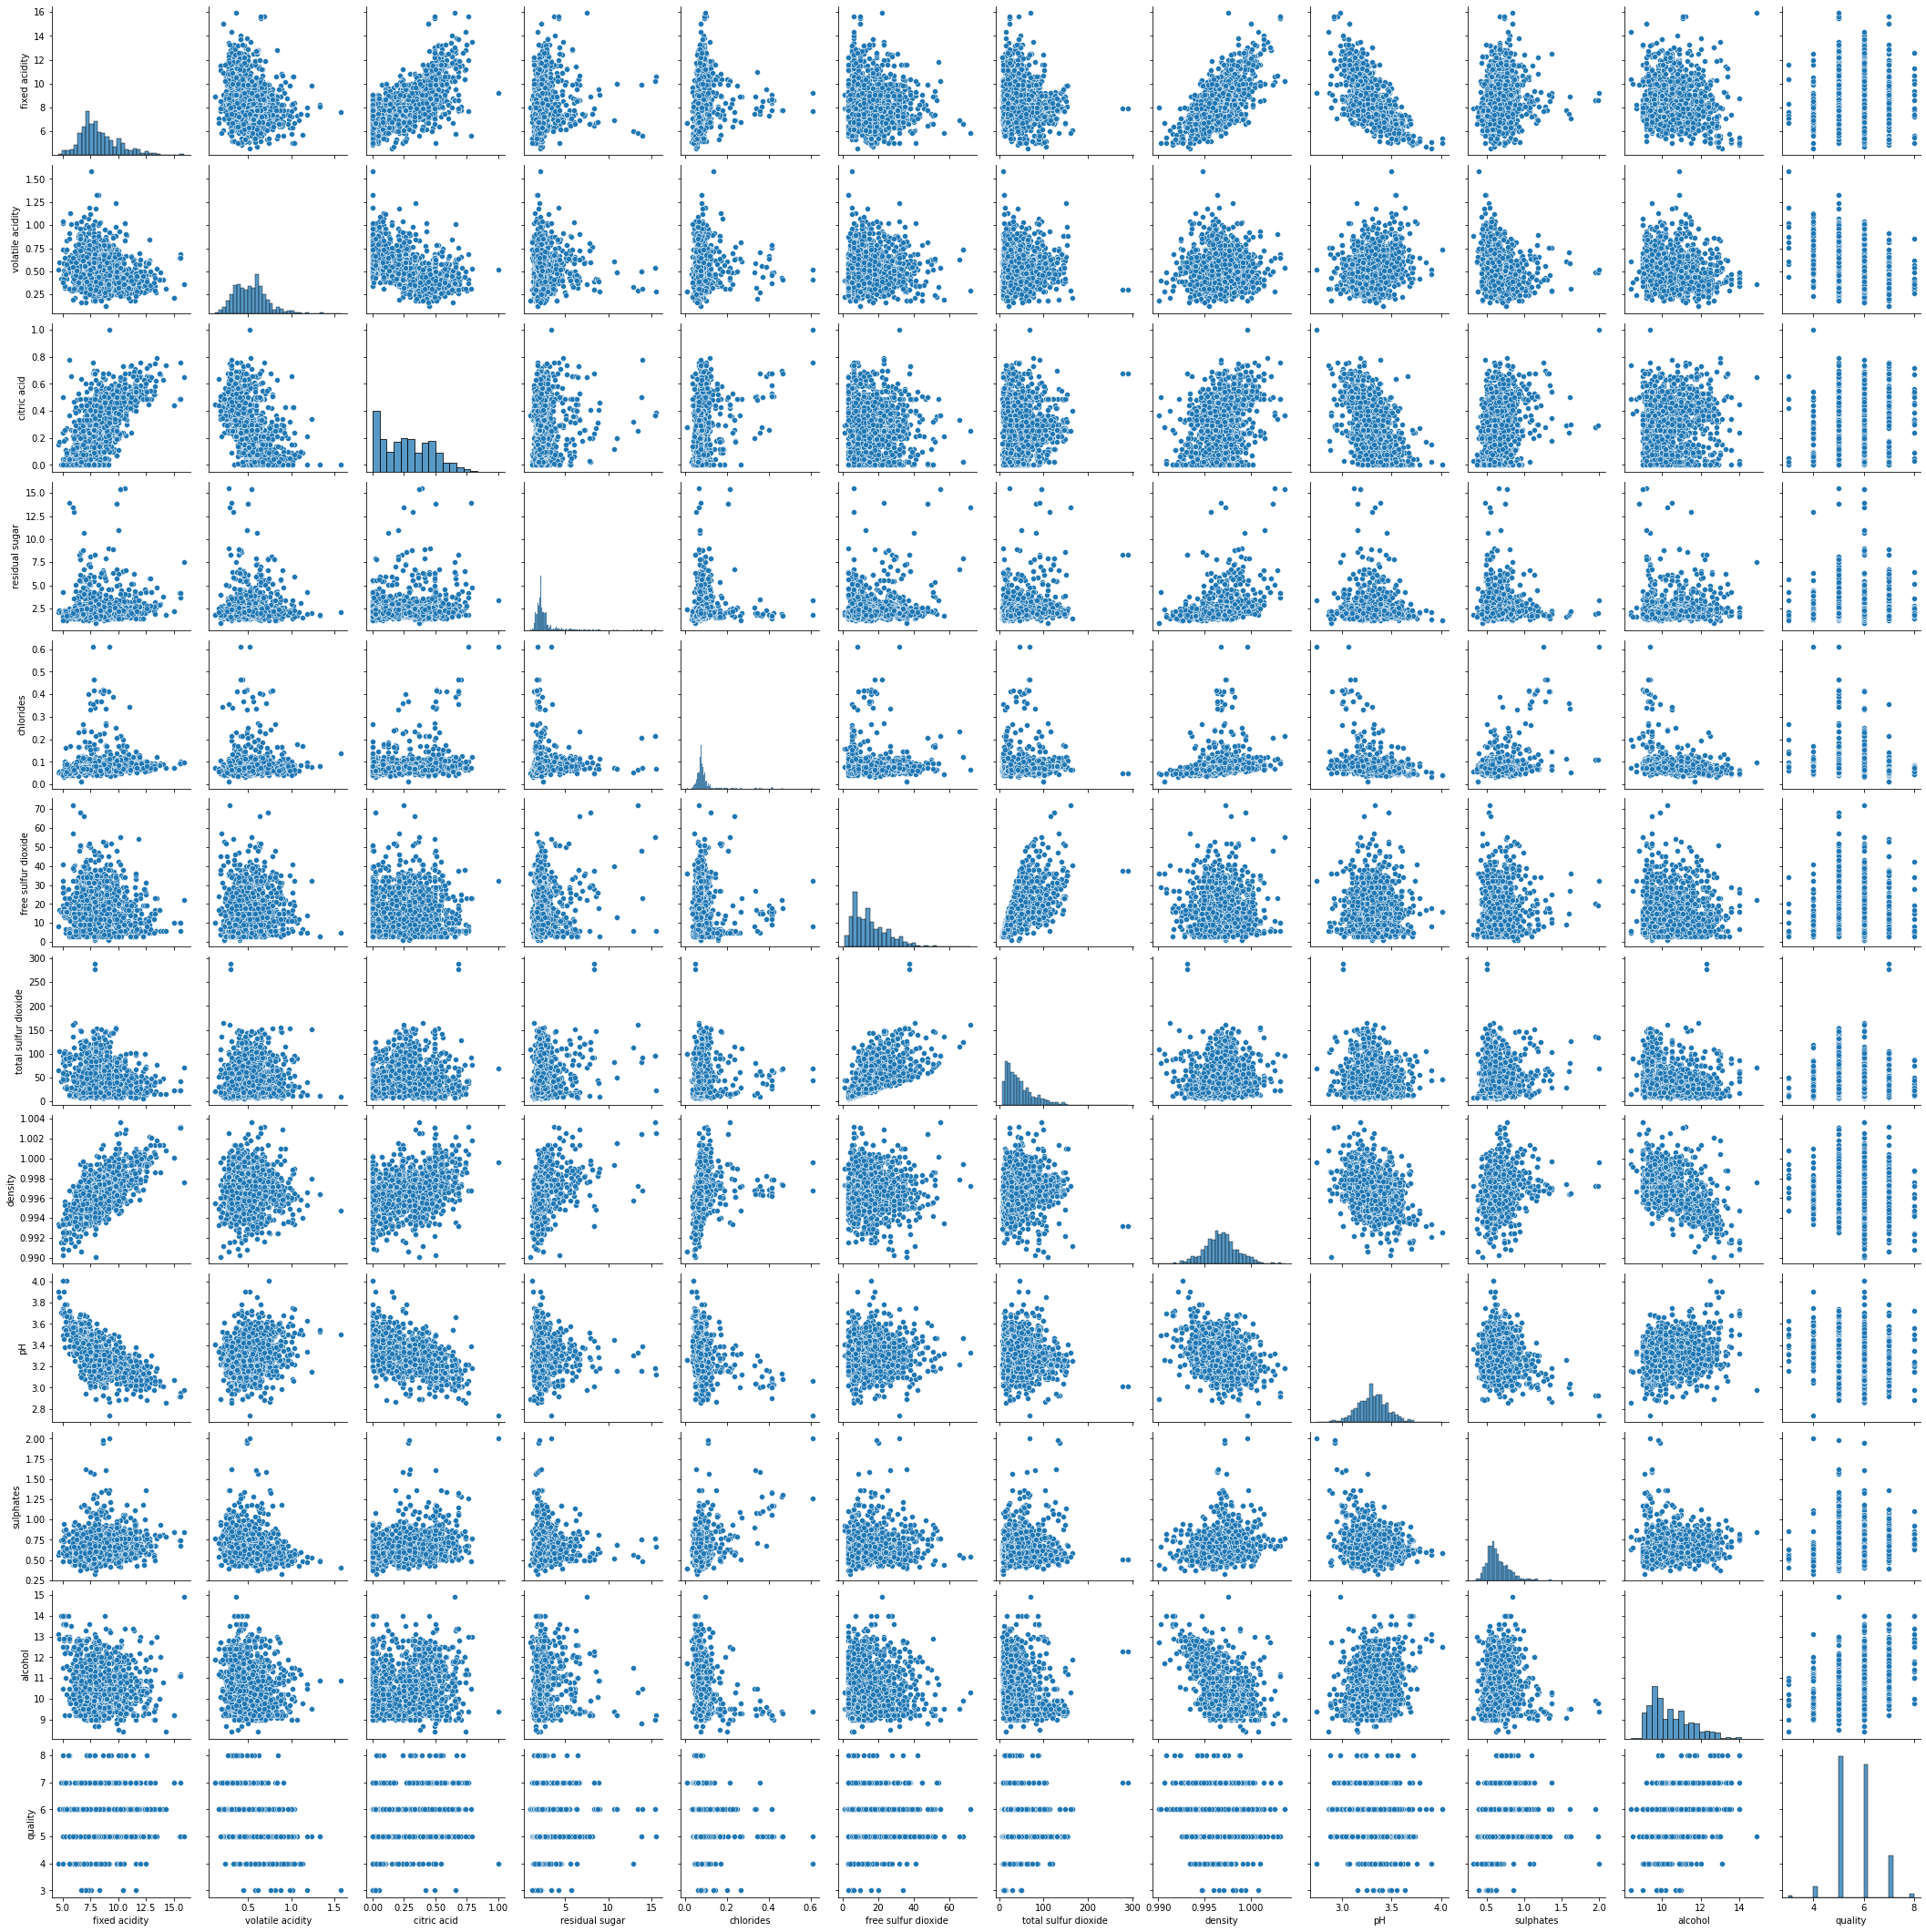

In [ ]:
sns.pairplot(df)

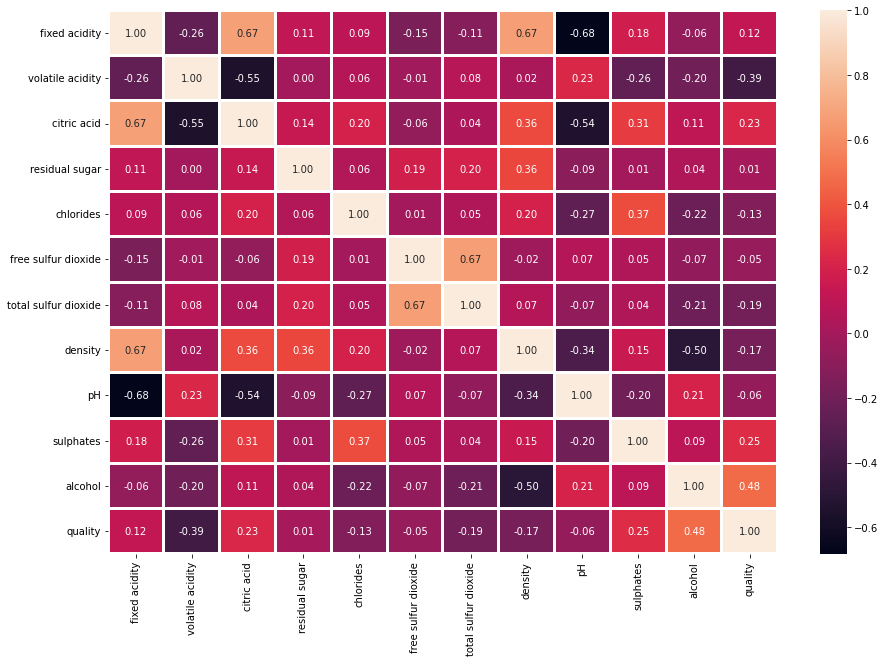

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
sns.set(font_scale=1)

### Insights
- We can see that none of the feature have a very high correlation with quality but Alcohol, Sulphate and Volatile acidity have a comparitively high correlation with quality.
- Fixed acidity is correlated positively with citric acid and density.
- Alcohol has a strong negative correlation with density and a weak positive correlation with pH.

### Checking for missing values

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Univariate Analysis

### Fixed acidity

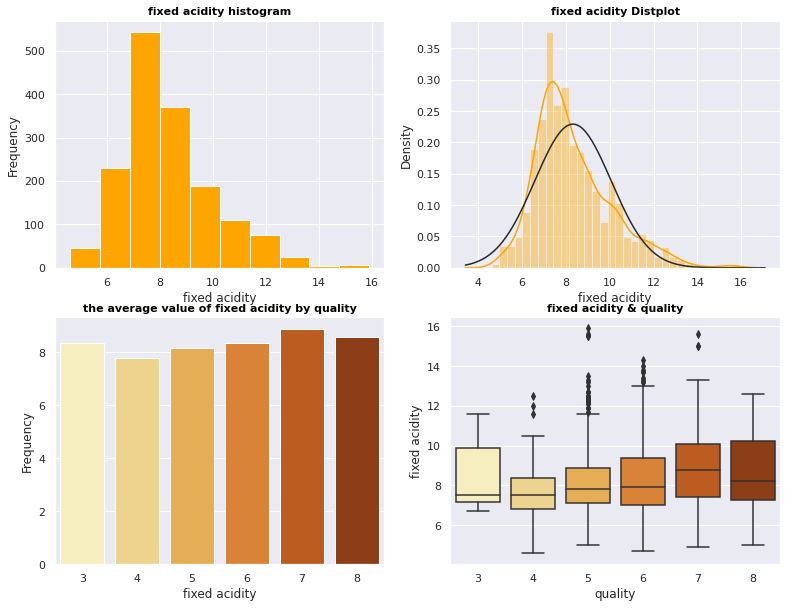

In [ ]:
quality = [3,4,5,6,7,8]
fixedAcidityMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["fixed acidity"].mean()
    fixedAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["fixed acidity"], color="orange")
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.title("fixed acidity histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = fixedAcidityMean, palette="YlOrBr")
plt.title("the average value of fixed acidity by quality", color = "black", fontweight='bold', fontsize = 11)
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["fixed acidity"], palette='YlOrBr')
plt.title("fixed acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Fixed Acidity doesn't affect the quality too much.
- ### The data is skewed to the right.

### Volatile Acidity

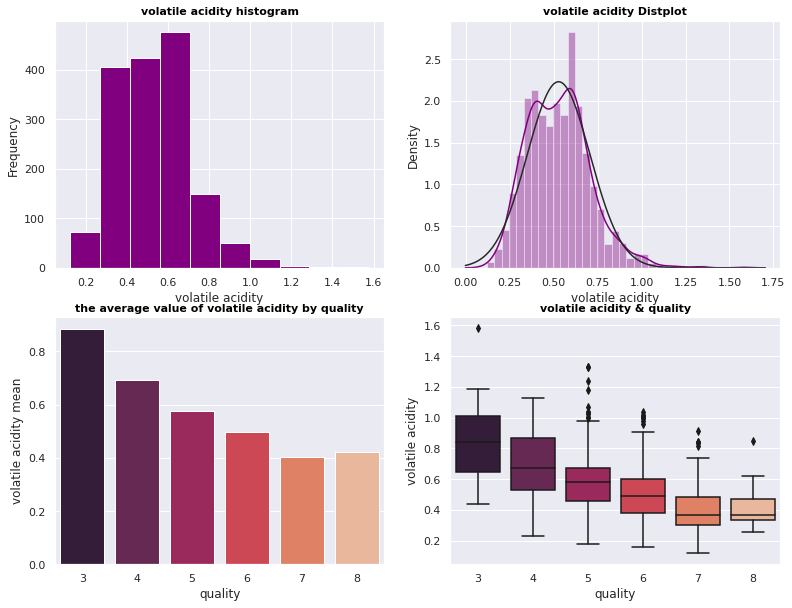

In [ ]:
VAMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["volatile acidity"].mean()
    VAMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["volatile acidity"], color="purple")
plt.xlabel("volatile acidity")
plt.ylabel("Frequency")
plt.title("volatile acidity histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["volatile acidity"], fit=norm, color="purple")
plt.title("volatile acidity Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = VAMean, palette= "rocket")
plt.title("the average value of volatile acidity by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("volatile acidity mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["volatile acidity"], palette='rocket')
plt.title("volatile acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### An increase in volatile acidity seems to show a decrease in quality.
- ### The distribuition is not too skewed.

### Citric Acid

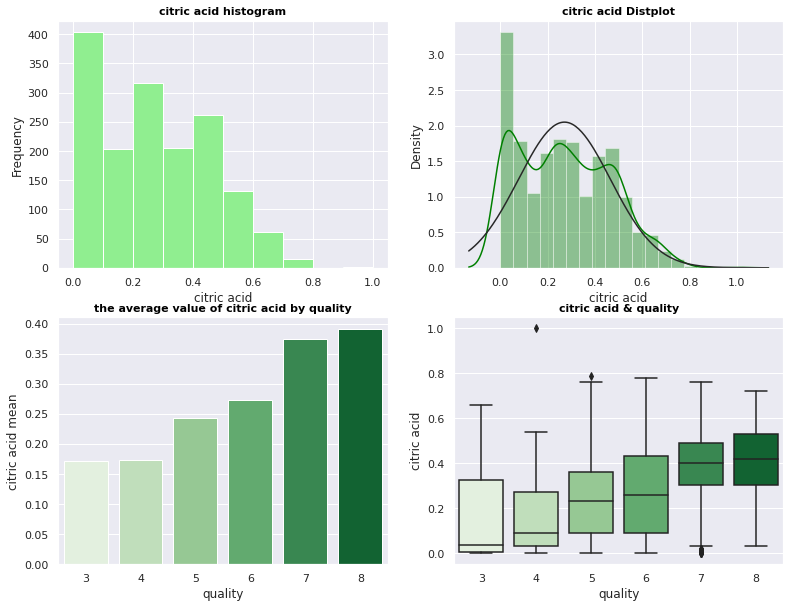

In [ ]:
CAMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["citric acid"].mean()
    CAMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["citric acid"], color="lightgreen")
plt.xlabel("citric acid")
plt.ylabel("Frequency")
plt.title("citric acid histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["citric acid"], fit=norm, color="green")
plt.title("citric acid Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = CAMean, palette= "Greens")
plt.title("the average value of citric acid by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("citric acid mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["citric acid"], palette='Greens')
plt.title("citric acid & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Increase in citric acid seems to positively affect the quality.

### Residual Sugar

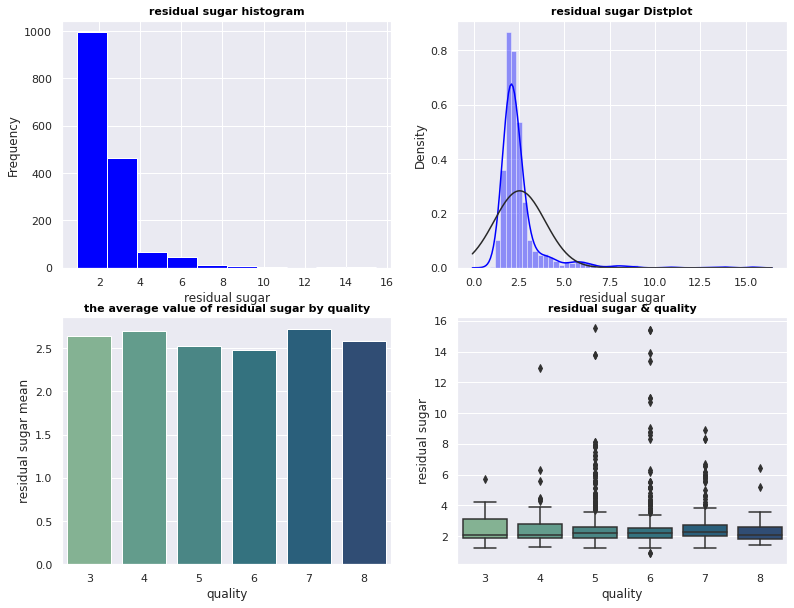

In [ ]:
RSMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["residual sugar"].mean()
    RSMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["residual sugar"], color="blue")
plt.xlabel("residual sugar")
plt.ylabel("Frequency")
plt.title("residual sugar histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["residual sugar"], fit=norm, color="blue")
plt.title("residual sugar Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = RSMean, palette= "crest")
plt.title("the average value of residual sugar by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("residual sugar mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["residual sugar"], palette='crest')
plt.title("residual sugar & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### It does not affect the quality too much
- ### Data is skewed to the right

### Chloride

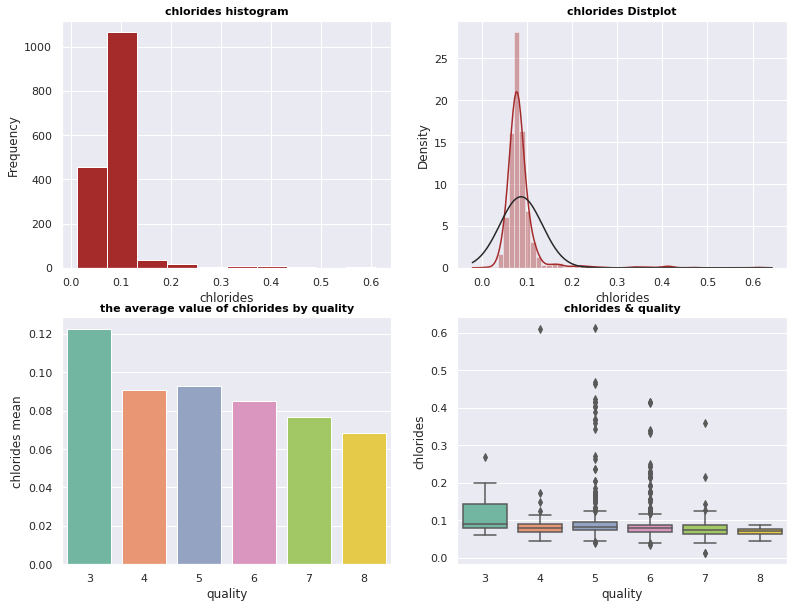

In [ ]:
CMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["chlorides"].mean()
    CMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["chlorides"], color="brown")
plt.xlabel("chlorides")
plt.ylabel("Frequency")
plt.title("chlorides histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["chlorides"], fit=norm, color="brown")
plt.title("chlorides Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = CMean, palette= "Set2")
plt.title("the average value of chlorides by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("chlorides mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["chlorides"], palette='Set2')
plt.title("chlorides & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Chloride is inversely proportionate to quality.
- ### There are a lot outliers.
- ### Data is skewed to the right.

### Free Sulfur Dioxide

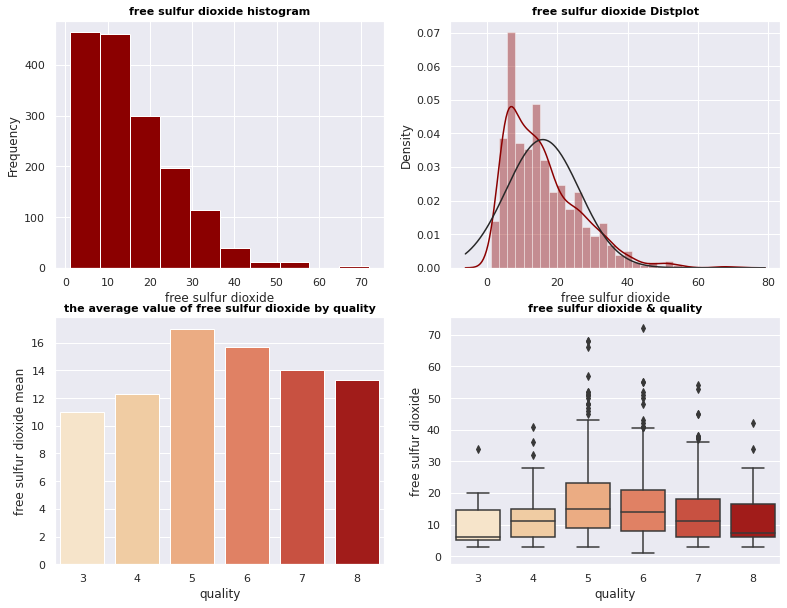

In [ ]:
FSDMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["free sulfur dioxide"].mean()
    FSDMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["free sulfur dioxide"], color="darkred")
plt.xlabel("free sulfur dioxide")
plt.ylabel("Frequency")
plt.title("free sulfur dioxide histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["free sulfur dioxide"], fit=norm, color="darkred")
plt.title("free sulfur dioxide Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = FSDMean, palette= "OrRd")
plt.title("the average value of free sulfur dioxide by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["free sulfur dioxide"], palette='OrRd')
plt.title("free sulfur dioxide & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Skewed data with tail to the right.
- ### Presence of outliers.
- ### No direct relation to the target.

### Total Sulfur Dioxide

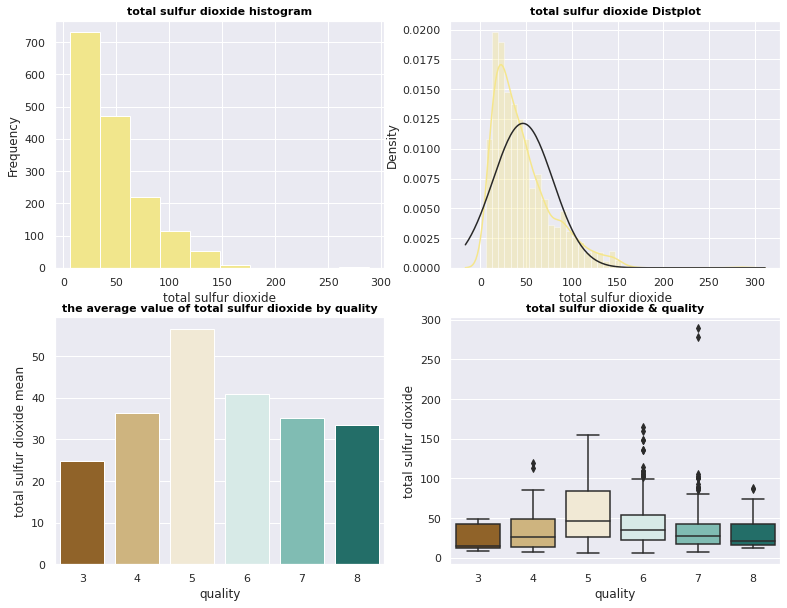

In [ ]:
TSDMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["total sulfur dioxide"].mean()
    TSDMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["total sulfur dioxide"], color="#F1E68C")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Frequency")
plt.title("total sulfur dioxide histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["total sulfur dioxide"], fit=norm, color="#F5E68C")
plt.title("total sulfur dioxide Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = TSDMean, palette= "BrBG")
plt.title("the average value of total sulfur dioxide by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("total sulfur dioxide mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["total sulfur dioxide"], palette='BrBG')
plt.title("total sulfur dioxide & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Doesn't seem to be affecting the target
- ### Skewed to the right

### Density

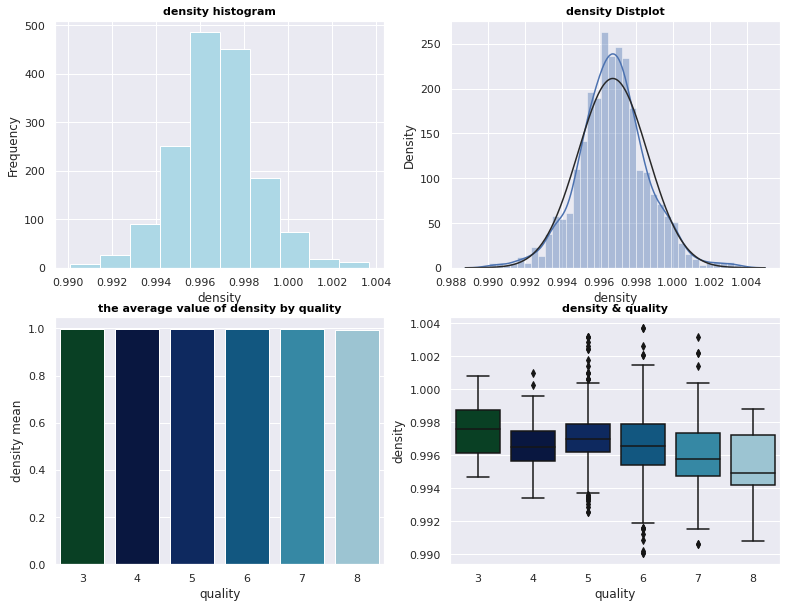

In [ ]:
dMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["density"].mean()
    dMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["density"], color="lightblue")
plt.xlabel("density")
plt.ylabel("Frequency")
plt.title("density histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["density"], fit=norm)
plt.title("density Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = dMean, palette= "ocean")
plt.title("the average value of density by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("density mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["density"], palette='ocean')
plt.title("density & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Normally distributed.
- ### Difficult to conclude a direct relationship to the target.

### pH

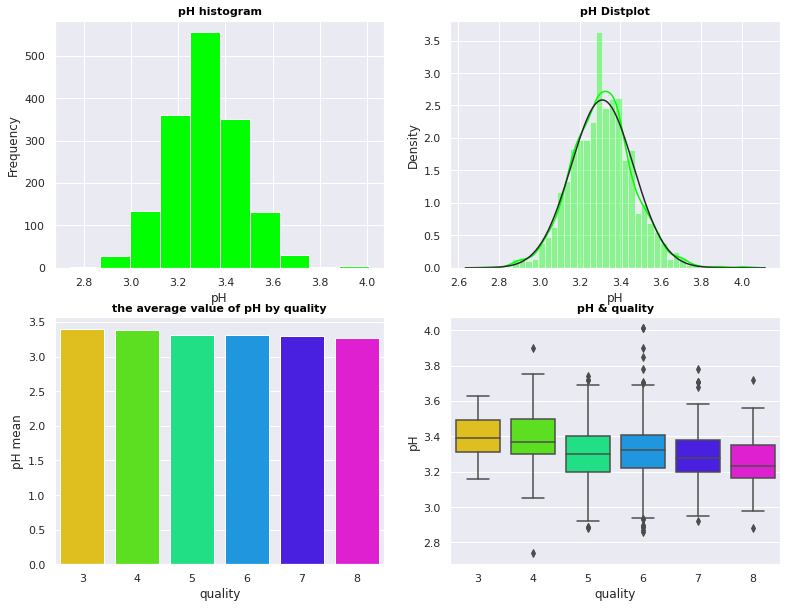

In [ ]:
pHMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["pH"].mean()
    pHMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["pH"], color="#00FF00")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title("pH histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["pH"], fit=norm, color = "#00FF00")
plt.title("pH Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = pHMean, palette= "hsv")
plt.title("the average value of pH by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("pH mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["pH"], palette='hsv')
plt.title("pH & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Normally Distributred
- ### Presence of Outliers.


### Sulphates

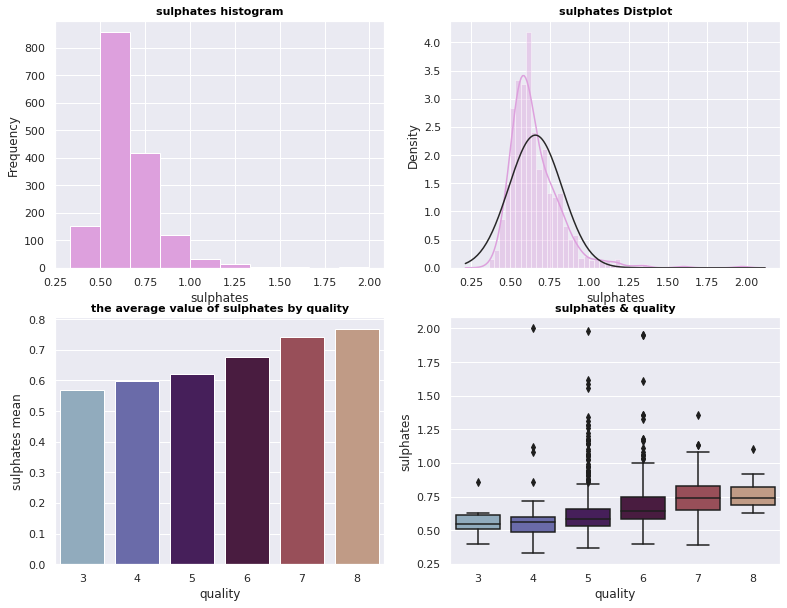

In [ ]:
sMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["sulphates"].mean()
    sMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["sulphates"], color="plum")
plt.xlabel("sulphates")
plt.ylabel("Frequency")
plt.title("sulphates histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["sulphates"], fit=norm, color="plum")
plt.title("sulphates Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = sMean, palette= "twilight")
plt.title("the average value of sulphates by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("sulphates mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["sulphates"], palette='twilight')
plt.title("sulphates & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Higher value of sulphates leads to higher value of quality.
- ### Large amount of outliers.

### Alcohol

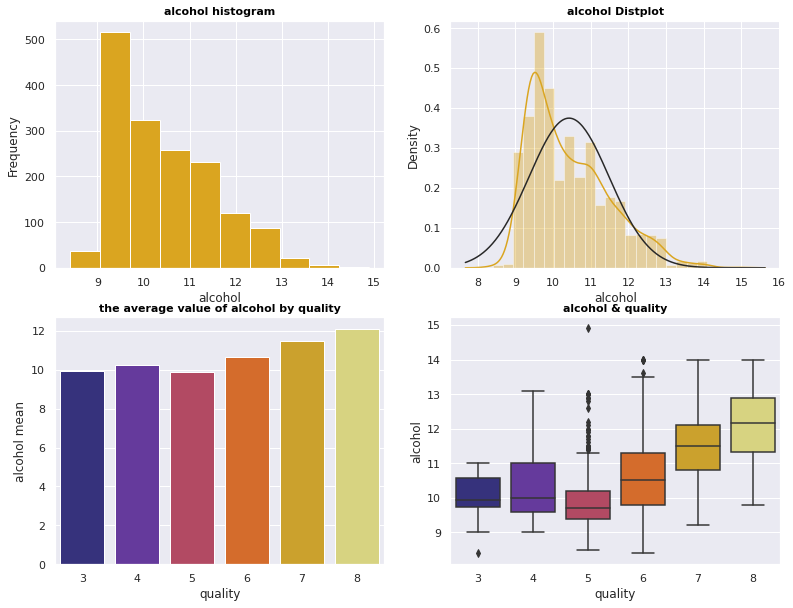

In [ ]:
alMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["alcohol"].mean()
    alMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["alcohol"], color="#DAA520")
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.title("alcohol histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["alcohol"], fit=norm, color="#DAA520")
plt.title("alcohol Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = alMean, palette= "CMRmap")
plt.title("the average value of alcohol by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("alcohol mean")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["alcohol"], palette='CMRmap')
plt.title("alcohol & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

- ### Observing the graph, we can say that alohocl is directtly proportionate to alcohol.
- ### Distribution skewed.

### Quality

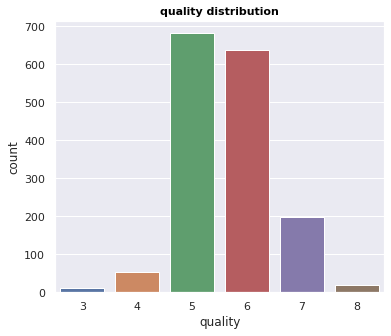

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(df["quality"])
plt.xlabel("quality")
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)



plt.show()

### We can see how our target variable is distributed

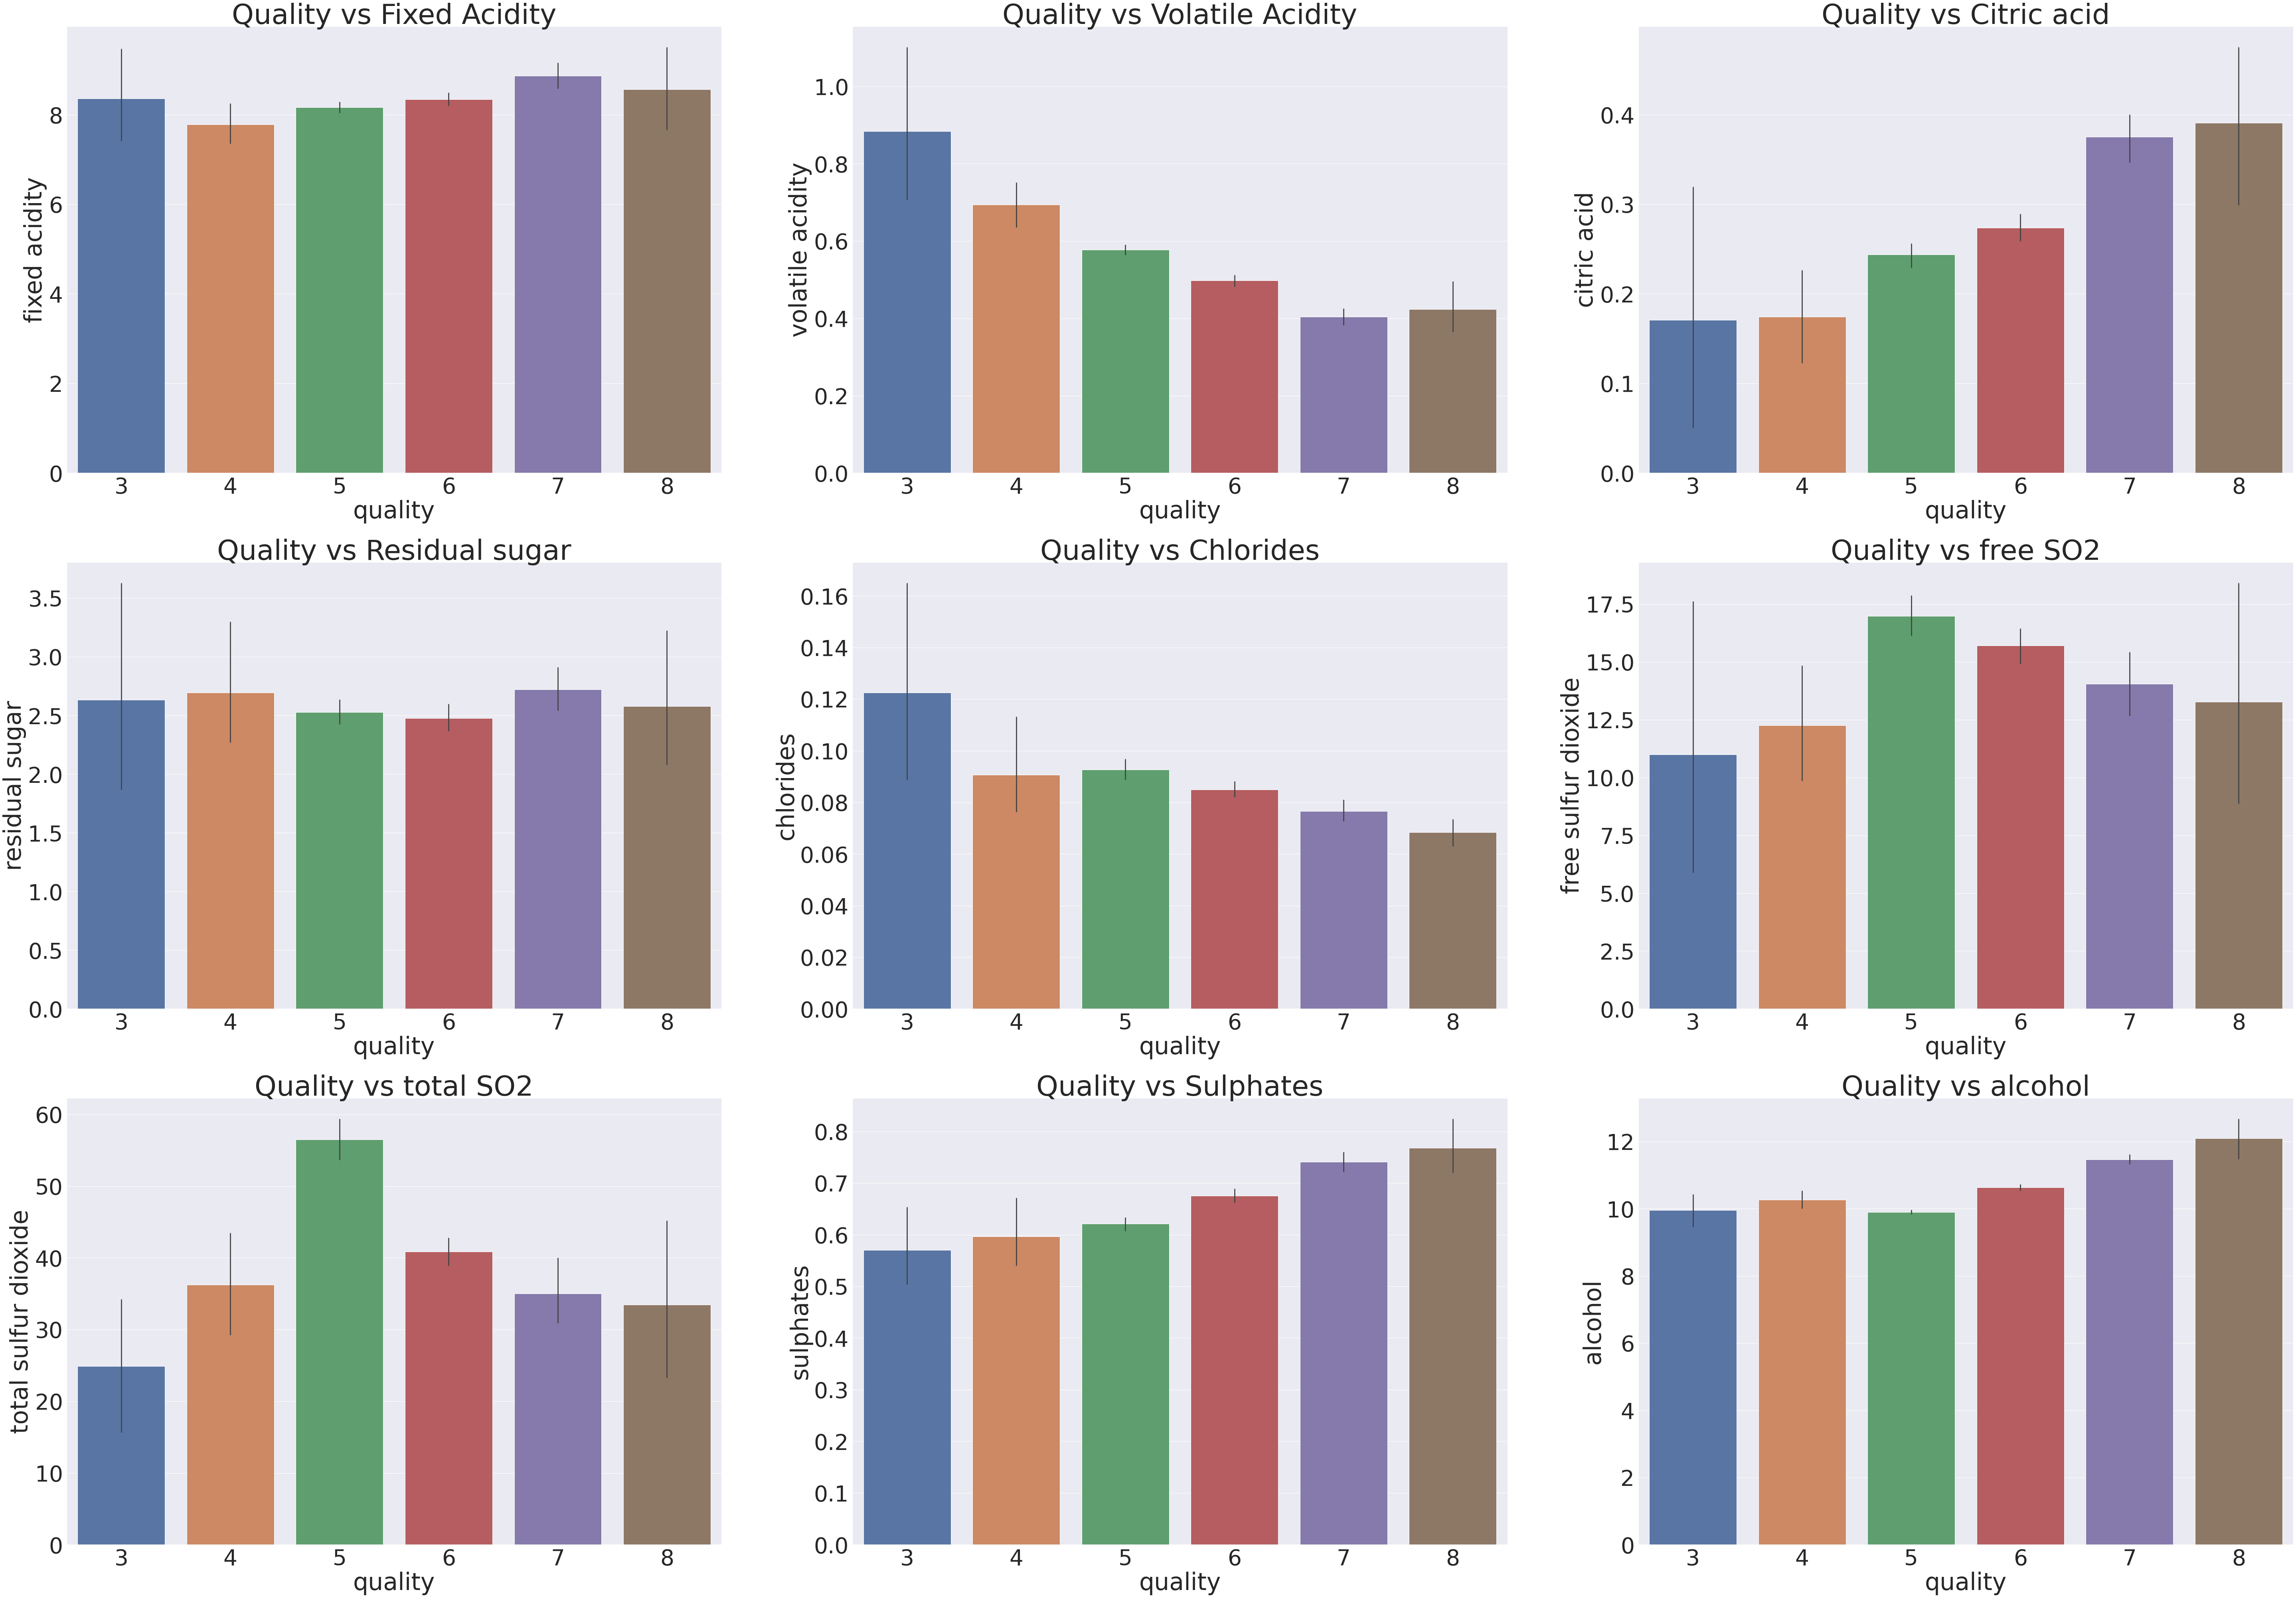

In [ ]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

## Data Preprocessing

### Removing unneccesary Outliers

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.75
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [ ]:
print("number of outliers detected --> ",len(df.loc[detect_outliers(df,df.columns[:-1])]))
df.loc[detect_outliers(df,df.columns[:-1])]

NameError: ignored

In [ ]:
df = df.drop(detect_outliers(df,df.columns[:-1]),axis = 0).reset_index(drop = True)

### Classifying quality of wine to good and bad, on basis of the mean quality value(5.6)

### Note:- classifying data about the mean position will help us give a balanced dataset.

In [ ]:
bins = (2, 5, 8)  
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

In [ ]:
label_quality = LabelEncoder()

In [ ]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [ ]:
df['quality'].value_counts()

1    822
0    697
Name: quality, dtype: int64

### So 0 indicates bad and 1 indicates good

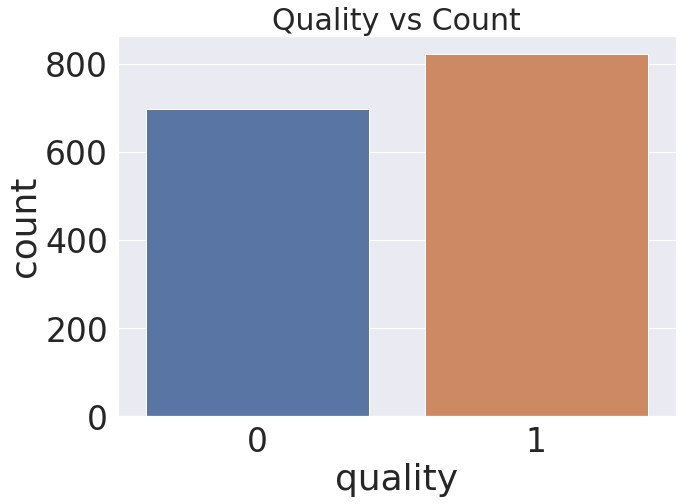

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=30)
sns.countplot(df['quality'])

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
X = df.drop('quality', axis = 1)
Y = df['quality']

### Splitting data into Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

NameError: ignored

In [ ]:
'''for i in X_train.columns:
    plt.hist(X_train[i],bins=10)
    plt.title(i)
    plt.show()'''

'for i in X_train.columns:\n    plt.hist(X_train[i],bins=10)\n    plt.title(i)\n    plt.show()'

### Normalization/Standardization

In [ ]:
X_train_log, X_test_log = X_train.drop('citric acid', axis=1), X_test.drop('citric acid', axis=1)
X_train_log, X_test_log= np.log10(X_train_log), np.log10(X_test_log)
X_train_log['citric acid']=X_train['citric acid']
X_test_log['citric acid']= X_test['citric acid']

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_log_scale = sc.fit_transform(X_train_log)
X_test_log_scale = sc.fit_transform(X_test_log)
X_train_log_scale

array([[ 1.0663689 ,  1.09593333,  0.00595026, ..., -0.50643409,
         0.60047896,  0.85798263],
       [ 0.74653812, -0.60118008,  0.26797128, ..., -1.15196773,
         0.11124687,  1.06628494],
       [ 0.34653044,  1.2280488 ,  0.00595026, ..., -0.68240547,
        -1.05257792, -0.23560448],
       ...,
       [-0.70394588, -0.20689857,  0.62409895, ..., -1.2514999 ,
         0.30967904, -0.6522091 ],
       [ 0.57888185, -0.82111688, -0.27992235, ...,  1.16358732,
         0.78997225,  0.28515129],
       [ 0.28677314,  1.45810861,  0.62409895, ..., -0.25372871,
         0.01060884, -1.38126718]])

### Data Scaled/Normalized/Less Skewed

In [ ]:
X_train_clean=pd.DataFrame(data=X_train_log_scale, columns=X_train_log.columns)
X_test_clean=pd.DataFrame(data=X_test_log_scale, columns=X_test_log.columns)
'''for i in X_train_log_scale_df.columns:
    plt.hist(X_train_log_scale_df[i],bins=10)
    plt.title(i)
    plt.show()'''

'for i in X_train_log_scale_df.columns:\n    plt.hist(X_train_log_scale_df[i],bins=10)\n    plt.title(i)\n    plt.show()'

## Feature Selection

In [ ]:
def cor_selector(X, y,num_feats,feature_name):
    # Your code goes here (Multiple lines)
    cor_list = []
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    cor_support = [True if i in cor_feature else False for i in feature_name]
    # Your code ends here
    return cor_support, cor_feature

def chi_squared_selector(X, y, num_feats,feature_name):
    # Your code goes here (Multiple lines)
    bestfeatures = SelectKBest(score_func=chi2, k=num_feats)
    topfeatures = bestfeatures.fit(X,y)
    featureScores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(topfeatures.scores_)], axis=1)
    featureScores.columns = ['Specs', 'Score']
    featureScores1=featureScores.nlargest(num_feats,'Score')
    chi_feature=featureScores1['Specs'].tolist()
    chi_support = [True if i in chi_feature else False for i in feature_name]
    # Your code ends here
    return chi_support, chi_feature

def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    lr = LogisticRegression(solver='lbfgs', max_iter=100)
    rfe_lr = RFE(estimator=lr, 
             n_features_to_select=num_feats,
             step=1,
             verbose=5
                )
    rfe_lr = rfe_lr.fit(X, y)
    rfe_support = rfe_lr.get_support()
    rfe_feature = X.loc[:, rfe_support].columns.tolist()
    # Your code ends here
    return rfe_support, rfe_feature

def embedded_log_reg_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=50000), max_features=num_feats)
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    # Your code ends here
    return embedded_lr_support, embedded_lr_feature

def embedded_rf_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf, 
                           max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    # Your code ends here
    return embedded_rf_support, embedded_rf_feature

def embedded_lgbm_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    lgbmc = LGBMClassifier(n_estimators=500,
                      learning_rate=0.05,
                      num_leaves=32,
                      colsample_bytree=0.2,
                      reg_alpha=3,
                      reg_lambda=1,
                      min_split_gain=0.01,
                      min_child_weight=40
                          )
    embedded_lgbm_selector = SelectFromModel(lgbmc,
                                         max_features=num_feats)
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    # Your code ends here
    return embedded_lgbm_support, embedded_lgbm_feature

In [ ]:
def autoFeatureSelector(X,y,num_feats,methods=[]):
    # Parameters
    # data - dataset to be analyzed (csv file)
    # methods - various feature selection methods we outlined before, use them all here (list)
    # Run every method we outlined above from the methods list and collect returned best features from every method
    feature_name = list(X.columns)
    if 'pearson' in methods:
        cor_support, cor_feature = cor_selector(X, y,num_feats, feature_name)
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats, feature_name)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
    
    
    # Combine all the above feature list and count the maximum set of features that got selected by all methods
    #### Your Code starts here (Multiple lines)
    best_features_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})
    best_features_selection_df['Total'] = np.sum(best_features_selection_df, axis=1)
    best_features_selection_df = best_features_selection_df.sort_values(['Total','Feature'] , ascending=False)
    best_features=best_features_selection_df.nlargest(num_feats, ['Total'])
    #### Your Code ends here
    return best_features

In [ ]:
best_features = autoFeatureSelector(X,Y,8, methods=['pearson', 'chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
print(best_features['Feature'].to_numpy())

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
['volatile acidity' 'sulphates' 'alcohol' 'total sulfur dioxide' 'density'
 'citric acid' 'residual sugar' 'pH']


In [ ]:
X_train_clean_sf=X_train_clean[best_features['Feature']].reset_index()
X_test_clean_sf=X_test_clean[best_features['Feature']].reset_index()
X_train_clean_sf

,index,volatile acidity,sulphates,alcohol,total sulfur dioxide,density,citric acid,residual sugar,pH
0,0,1.095933,-0.506434,0.600479,-0.179620,-0.046335,0.857983,0.005950,-1.140413
1,1,-0.601180,-1.151968,0.111247,-0.817242,0.610000,1.066285,0.267971,-1.140413
2,2,1.228049,-0.682405,-1.052578,0.262210,-0.222264,-0.235604,0.005950,-1.498853
3,3,0.589306,-0.336532,-0.941290,0.262210,0.129542,-0.652209,0.139691,-0.857733
4,4,-3.186122,-0.772806,1.860379,-0.179620,-1.996240,0.910058,0.267971,0.238609
...,...,...,...,...,...,...,...,...,...
1210,1210,-0.821117,-1.054407,-0.941290,-0.435525,0.773968,1.326663,-0.433242,-0.928070
1211,1211,-0.745883,-0.593634,-1.052578,1.777431,0.188155,0.493454,0.840904,-0.787618
1212,1212,-0.206899,-1.251500,0.309679,0.077798,-0.257456,-0.652209,0.624099,0.305381
1213,1213,-0.821117,1.163587,0.789972,-1.235793,-0.539070,0.285151,-0.279922,-0.098270


## Random Forest Classifier

In [ ]:
RF = RandomForestClassifier(random_state=1)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid=GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
grid.fit(X_train_clean, Y_train)
pred_RF = grid.predict(X_test_clean)

In [ ]:
pred1 = accuracy_score(Y_test,pred_RF)
print(pred1*100)

77.63157894736842


In [ ]:
f1_Score=f1_score(Y_test,pred_RF)
print(f1_Score*100)

78.48101265822785


In [ ]:
print("Total Predictions :", len(pred_RF))
print("Correct Prediction :" ,sum(pred_RF == Y_test))

print("Incorrect Prediction : ", sum(pred_RF != Y_test))
print("Accuracy :", sum(pred_RF == Y_test)*100 / len(pred_RF), "%")

Total Predictions : 304
Correct Prediction : 236
Incorrect Prediction :  68
Accuracy : 77.63157894736842 %


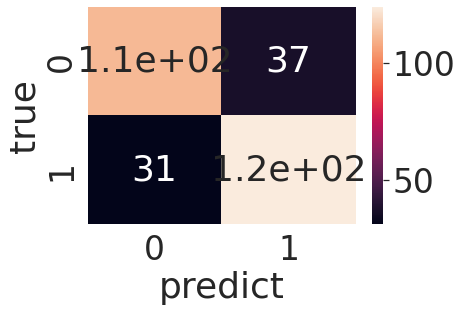

In [ ]:
cm1=confusion_matrix(Y_test, pred_RF)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

### using Selected features

In [ ]:
RF = RandomForestClassifier(random_state=1)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid=GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
grid.fit(X_train_clean_sf, Y_train)
pred_RF = grid.predict(X_test_clean_sf)

In [ ]:
pred1 = accuracy_score(Y_test,pred_RF)
print(pred1*100)

78.28947368421053


In [ ]:
f1_Score=f1_score(Y_test,pred_RF)
print(f1_Score*100)

79.24528301886792


In [ ]:
print("Total Predictions :", len(pred_RF))
print("Correct Prediction :" ,sum(pred_RF == Y_test))

print("Incorrect Prediction : ", sum(pred_RF != Y_test))
print("Accuracy :", sum(pred_RF == Y_test)*100 / len(pred_RF), "%")

Total Predictions : 304
Correct Prediction : 238
Incorrect Prediction :  66
Accuracy : 78.28947368421052 %


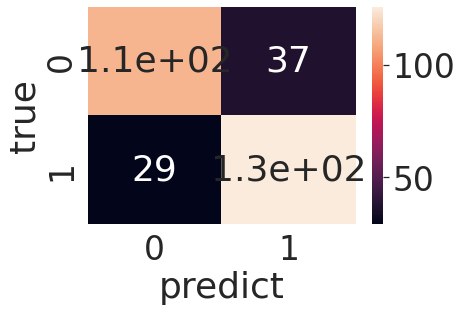

In [ ]:
cm1=confusion_matrix(Y_test, pred_RF)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

## SGD Classifier

In [ ]:
loss=['hinge','log','modified_huber']
alpha=[0.0001,0.001]
param_grid = {'loss': loss, 'alpha': alpha}
grid= GridSearchCV(SGDClassifier(
        penalty='l2',
        l1_ratio=0.15,
        fit_intercept=True,
        max_iter=1000,
        tol=0.001,
        shuffle=True,
        verbose=0,
        epsilon=0.1,
        n_jobs=None,
        random_state=1,
        learning_rate='optimal',
        eta0=0.0,
        power_t=0.5,
        early_stopping=False,
        validation_fraction=0.1,
        n_iter_no_change=5,
        class_weight=None,
        warm_start=False,
        average=False,
    ),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train_clean,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........alpha=0.0001, loss=hinge;, score=0.658 total time=   0.0s
[CV 2/5] END ..........alpha=0.0001, loss=hinge;, score=0.716 total time=   0.0s
[CV 3/5] END ..........alpha=0.0001, loss=hinge;, score=0.728 total time=   0.0s
[CV 4/5] END ..........alpha=0.0001, loss=hinge;, score=0.716 total time=   0.0s
[CV 5/5] END ..........alpha=0.0001, loss=hinge;, score=0.634 total time=   0.0s
[CV 1/5] END ............alpha=0.0001, loss=log;, score=0.716 total time=   0.0s
[CV 2/5] END ............alpha=0.0001, loss=log;, score=0.691 total time=   0.0s
[CV 3/5] END ............alpha=0.0001, loss=log;, score=0.679 total time=   0.0s
[CV 4/5] END ............alpha=0.0001, loss=log;, score=0.733 total time=   0.0s
[CV 5/5] END ............alpha=0.0001, loss=log;, score=0.687 total time=   0.0s
[CV 1/5] END .alpha=0.0001, loss=modified_huber;, score=0.617 total time=   0.0s
[CV 2/5] END .alpha=0.0001, loss=modified_huber;,

GridSearchCV(estimator=SGDClassifier(random_state=1),
             param_grid={'alpha': [0.0001, 0.001],
                         'loss': ['hinge', 'log', 'modified_huber']},
             verbose=3)

In [ ]:
grid.best_params_ 

{'alpha': 0.001, 'loss': 'hinge'}

In [ ]:
grid.best_estimator_

SGDClassifier(alpha=0.001, random_state=1)

In [ ]:
grid_predictions = grid.predict(X_test_clean)

In [ ]:
accuracy_Score = accuracy_score(Y_test,grid_predictions)
print(accuracy_Score*100)

72.69736842105263


In [ ]:
f1_Score=f1_score(Y_test,grid_predictions)
print(f1_Score*100)

73.81703470031546


In [ ]:
print("Total Predictions :", len(grid_predictions))
print("Correct Prediction :" ,sum(grid_predictions == Y_test))

print("Incorrect Prediction : ", sum(grid_predictions != Y_test))
print("Accuracy :", sum(grid_predictions == Y_test)*100 / len(grid_predictions), "%")

Total Predictions : 304
Correct Prediction : 221
Incorrect Prediction :  83
Accuracy : 72.69736842105263 %


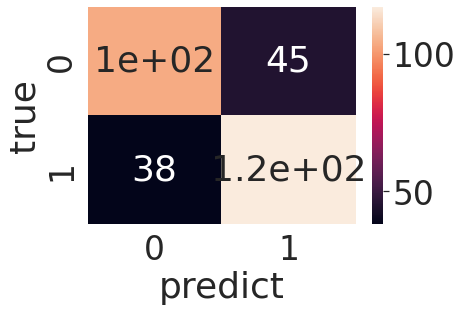

In [ ]:
cm1=confusion_matrix(Y_test, grid_predictions)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

### using Selected features

In [ ]:
loss=['hinge','log','modified_huber']
alpha=[0.0001,0.001]
param_grid = {'loss': loss, 'alpha': alpha}
grid= GridSearchCV(SGDClassifier(
        penalty='l2',
        l1_ratio=0.15,
        fit_intercept=True,
        max_iter=1000,
        tol=0.001,
        shuffle=True,
        verbose=0,
        epsilon=0.1,
        n_jobs=None,
        random_state=1,
        learning_rate='optimal',
        eta0=0.0,
        power_t=0.5,
        early_stopping=False,
        validation_fraction=0.1,
        n_iter_no_change=5,
        class_weight=None,
        warm_start=False,
        average=False,
    ),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train_clean_sf,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........alpha=0.0001, loss=hinge;, score=0.576 total time=   0.0s
[CV 2/5] END ..........alpha=0.0001, loss=hinge;, score=0.453 total time=   0.0s
[CV 3/5] END ..........alpha=0.0001, loss=hinge;, score=0.453 total time=   0.0s
[CV 4/5] END ..........alpha=0.0001, loss=hinge;, score=0.551 total time=   0.0s
[CV 5/5] END ..........alpha=0.0001, loss=hinge;, score=0.551 total time=   0.0s
[CV 1/5] END ............alpha=0.0001, loss=log;, score=0.630 total time=   0.0s
[CV 2/5] END ............alpha=0.0001, loss=log;, score=0.453 total time=   0.0s
[CV 3/5] END ............alpha=0.0001, loss=log;, score=0.453 total time=   0.0s
[CV 4/5] END ............alpha=0.0001, loss=log;, score=0.449 total time=   0.0s
[CV 5/5] END ............alpha=0.0001, loss=log;, score=0.449 total time=   0.0s
[CV 1/5] END .alpha=0.0001, loss=modified_huber;, score=0.547 total time=   0.0s
[CV 2/5] END .alpha=0.0001, loss=modified_huber;,

GridSearchCV(estimator=SGDClassifier(random_state=1),
             param_grid={'alpha': [0.0001, 0.001],
                         'loss': ['hinge', 'log', 'modified_huber']},
             verbose=3)

In [ ]:
grid.best_params_ 

{'alpha': 0.001, 'loss': 'hinge'}

In [ ]:
grid.best_estimator_

SGDClassifier(alpha=0.001, random_state=1)

In [ ]:
grid_predictions = grid.predict(X_test_clean_sf)

In [ ]:
accuracy_Score = accuracy_score(Y_test,grid_predictions)
print(accuracy_Score*100)

75.0


In [ ]:
f1_Score=f1_score(Y_test,grid_predictions)
print(f1_Score*100)

74.66666666666667


In [ ]:
print("Total Predictions :", len(grid_predictions))
print("Correct Prediction :" ,sum(grid_predictions == Y_test))

print("Incorrect Prediction : ", sum(grid_predictions != Y_test))
print("Accuracy :", sum(grid_predictions == Y_test)*100 / len(grid_predictions), "%")

Total Predictions : 304
Correct Prediction : 228
Incorrect Prediction :  76
Accuracy : 75.0 %


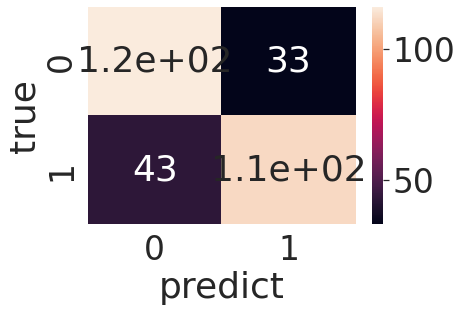

In [ ]:
cm1=confusion_matrix(Y_test, grid_predictions)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_para = {'criterion': ['entropy','gini'], 'splitter': ['random','best'], 'min_samples_split': [2,5]} 
from sklearn.model_selection import GridSearchCV
DT_grid = GridSearchCV(DecisionTreeClassifier(),tree_para,refit=True,verbose=3)

In [ ]:
DT_grid.fit(X_train_clean, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.716 total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.716 total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.716 total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.712 total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.724 total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=entropy

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': [2, 5],
                         'splitter': ['random', 'best']},
             verbose=3)

In [ ]:
print("Best params", DT_grid.best_params_)

Best params {'criterion': 'entropy', 'min_samples_split': 2, 'splitter': 'best'}


F1 score 74.84276729559748
Total Predictions : 304
Correct Prediction : 224
Incorrect Prediction :  80
Accuracy : 73.6842105263158 %
[[105  44]
 [ 36 119]]


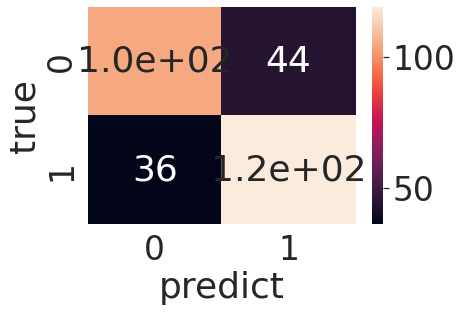

In [ ]:
DT_grid_pred = DT_grid.predict(X_test_clean)
f1_Score=f1_score(Y_test,DT_grid_pred)
print("F1 score",f1_Score*100)
print("Total Predictions :", len(DT_grid_pred))
print("Correct Prediction :" ,sum(DT_grid_pred == Y_test))
print("Incorrect Prediction : ", sum(DT_grid_pred != Y_test))
print("Accuracy :", sum(DT_grid_pred == Y_test)*100 / len(DT_grid_pred), "%")
print(confusion_matrix(Y_test,DT_grid_pred))
axs = sns.heatmap(confusion_matrix(Y_test,DT_grid_pred),annot=True)
axs.set(xlabel='predict', ylabel='true')
plt.show()

### using Selected features

In [ ]:
tree_para = {'criterion': ['entropy','gini'], 'splitter': ['random','best'], 'min_samples_split': [2,5]} 
from sklearn.model_selection import GridSearchCV
DT_grid = GridSearchCV(DecisionTreeClassifier(),tree_para,refit=True,verbose=3)

In [ ]:
DT_grid.fit(X_train_clean_sf, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.691 total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=entropy, min_samples_split=2, splitter=random;, score=0.634 total time=   0.0s
[CV 1/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.724 total time=   0.0s
[CV 3/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.663 total time=   0.0s
[CV 4/5] END criterion=entropy, min_samples_split=2, splitter=best;, score=0.675 total time=   0.0s
[CV 5/5] END criterion=entropy

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': [2, 5],
                         'splitter': ['random', 'best']},
             verbose=3)

In [ ]:
print("Best params", DT_grid.best_params_)

Best params {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}


F1 score 72.12121212121212
Total Predictions : 304
Correct Prediction : 212
Incorrect Prediction :  92
Accuracy : 69.73684210526316 %
[[ 93  56]
 [ 36 119]]


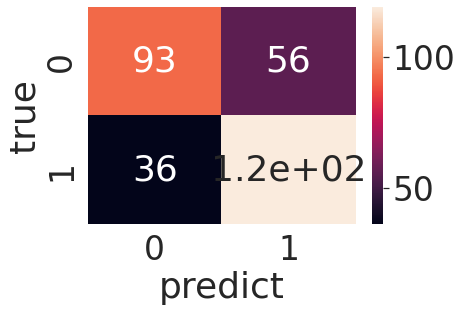

In [ ]:
DT_grid_pred = DT_grid.predict(X_test_clean_sf)
f1_Score=f1_score(Y_test,DT_grid_pred)
print("F1 score",f1_Score*100)
print("Total Predictions :", len(DT_grid_pred))
print("Correct Prediction :" ,sum(DT_grid_pred == Y_test))
print("Incorrect Prediction : ", sum(DT_grid_pred != Y_test))
print("Accuracy :", sum(DT_grid_pred == Y_test)*100 / len(DT_grid_pred), "%")
print(confusion_matrix(Y_test,DT_grid_pred))
axs = sns.heatmap(confusion_matrix(Y_test,DT_grid_pred),annot=True)
axs.set(xlabel='predict', ylabel='true')
plt.show()

## LOGISTIC REGRESSION

In [ ]:
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [ ]:
grid=GridSearchCV(LogisticRegression(), param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train_clean,Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.753 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.745 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.757 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.695 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.695 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
predictions = grid.predict(X_test_clean)

In [ ]:
f1_Score=f1_score(Y_test,predictions)
print(f1_Score*100)

76.10062893081762


In [ ]:
print(confusion_matrix(Y_test,predictions))

[[107  42]
 [ 34 121]]


In [ ]:
a= ((86+128)/(86+38+44+128))
a=a*100
print('Accuracy=',a)

Accuracy= 72.2972972972973


### using Selected features

In [ ]:
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [ ]:
grid=GridSearchCV(LogisticRegression(), param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train_clean_sf,Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.745 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.1s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.749 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.687 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.675 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
predictions = grid.predict(X_test_clean_sf)

In [ ]:
f1_Score=f1_score(Y_test,predictions)
print(f1_Score*100)

75.70977917981072


In [ ]:
print(confusion_matrix(Y_test,predictions))

[[107  42]
 [ 35 120]]


In [ ]:
a= ((86+128)/(86+38+44+128))
a=a*100
print('Accuracy=',a)

Accuracy= 72.2972972972973


## SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_clean,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.765 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.741 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.761 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.728 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.765 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.741 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.761 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.728 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.765 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
grid.best_params_ 

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
grid.best_estimator_ 

SVC(C=10, gamma=1, kernel='linear')

In [ ]:
Y_pred = grid.predict(X_test_clean)

In [ ]:
f1_Score=f1_score(Y_test,Y_pred)
print(f1_Score*100)

73.88535031847134


In [ ]:
print("Total Predictions :", len(Y_pred))
print("Correct Prediction :" ,sum(Y_pred == Y_test))

print("Incorrect Prediction : ", sum(Y_pred != Y_test))
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy :", accuracy * 100, "%")

Total Predictions : 304
Correct Prediction : 222
Incorrect Prediction :  82
Accuracy : 73.02631578947368 %


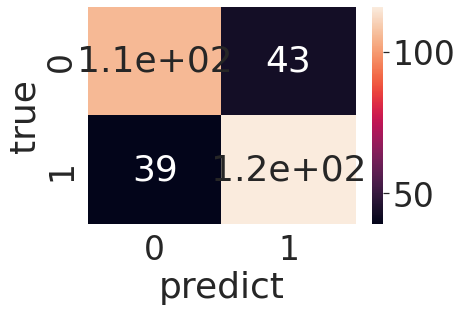

In [ ]:

cms = confusion_matrix(Y_test, Y_pred)
# cm
axs = sns.heatmap(cms,annot=True)
axs.set(xlabel='predict', ylabel='true')
plt.show()

### using Selected features

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_clean_sf,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.765 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.741 total time=   3.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.733 total time=   3.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.728 total time=   2.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.716 total time=   2.3s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.765 total time=   1.5s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.741 total time=   3.8s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   3.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.728 total time=   2.4s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.716 total time=   2.3s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.765 total time=   1.5s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
grid.best_params_ 

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
grid.best_estimator_ 

SVC(C=1, gamma=1, kernel='linear')

In [ ]:
Y_pred = grid.predict(X_test_clean_sf)

In [ ]:
f1_Score=f1_score(Y_test,Y_pred)
print(f1_Score*100)

73.71794871794873


In [ ]:
print("Total Predictions :", len(Y_pred))
print("Correct Prediction :" ,sum(Y_pred == Y_test))

print("Incorrect Prediction : ", sum(Y_pred != Y_test))
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy :", accuracy * 100, "%")

Total Predictions : 304
Correct Prediction : 222
Incorrect Prediction :  82
Accuracy : 73.02631578947368 %


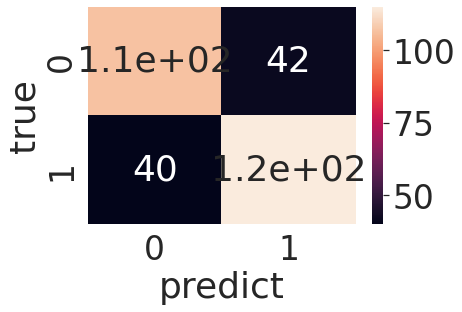

In [ ]:

cms = confusion_matrix(Y_test, Y_pred)
# cm
axs = sns.heatmap(cms,annot=True)
axs.set(xlabel='predict', ylabel='true')
plt.show()